In [6]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *

data = {
    'Case 0 sticking': load_data('../stats/fpm_0_sticking_solver_1_numba.json'),
    'Case 0 sliding': load_data('../stats/fpm_0_sliding_solver_1_numba.json'),
    'Case 0 open': load_data('../stats/fpm_0_open_solver_1_numba.json'),
    'Case 1 sticking': load_data('../stats/fpm_1_sticking_solver_1_numba.json'),
    'Case 1 sliding': load_data('../stats/fpm_1_sliding_solver_1_numba.json'),
    'Case 1 open': load_data('../stats/fpm_1_open_solver_1_numba.json'),
    'Case 2 sticking': load_data('../stats/fpm_2_sticking_solver_1_numba.json'),
    'Case 2 sliding': load_data('../stats/fpm_2_sliding_solver_1_numba.json'),
    'Case 2 open': load_data('../stats/fpm_2_open_solver_1_numba.json'),
}

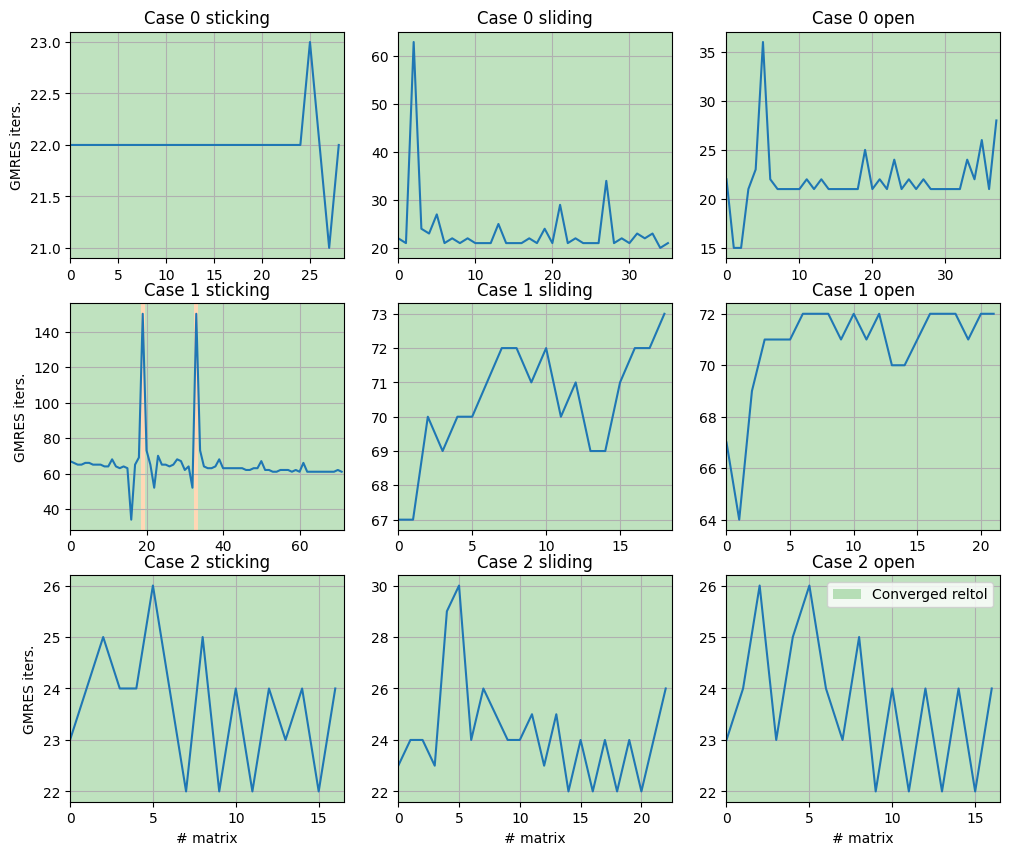

In [7]:
plt.figure(figsize=(12, 10))
for i, (name, entry) in enumerate(data.items()):
    plt.subplot(3, 3, i+1)
    legend = i == 8
    color_converged_reason(entry, legend=legend)
    plt.title(name)
    plt.plot(get_gmres_iterations(entry))
    if i % 3 == 0:
        plt.ylabel('GMRES iters.')
    if i >= 6:
        plt.xlabel('# matrix')
    # plt.yscale('log')
    if legend:
        plt.legend()

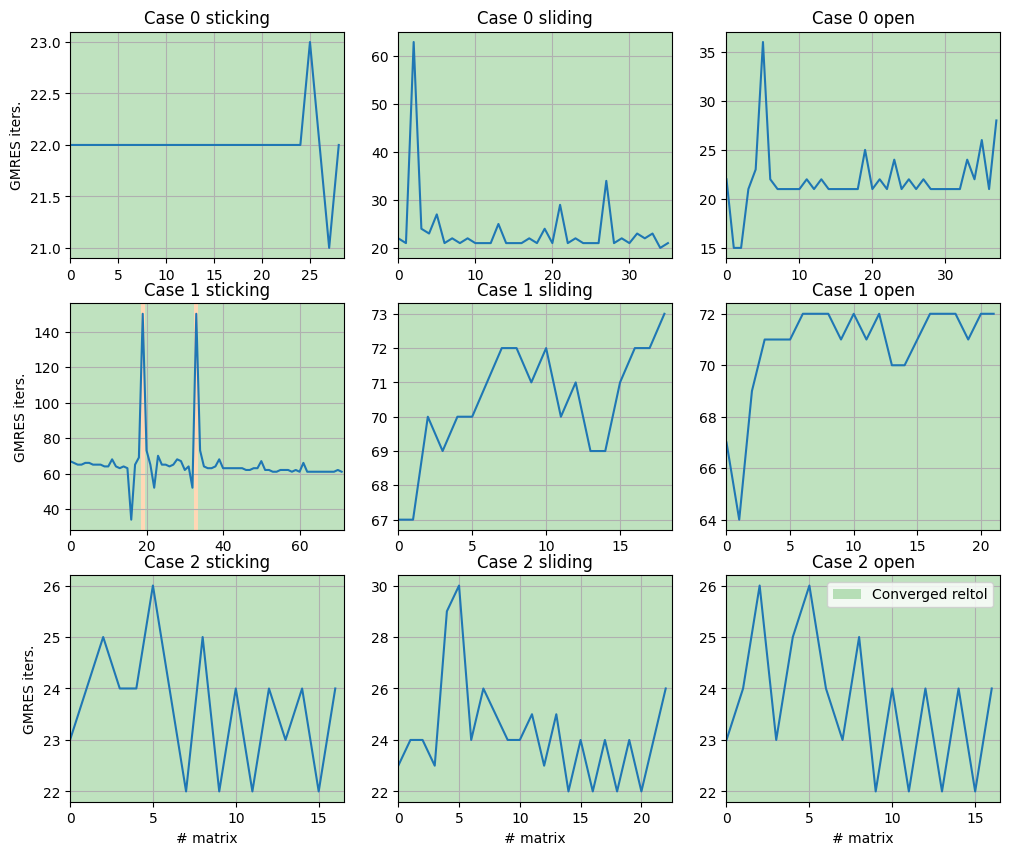

In [8]:
plt.figure(figsize=(12, 10))
for i, (name, entry) in enumerate(data.items()):
    plt.subplot(3, 3, i+1)
    legend = i == 8
    color_converged_reason(entry, legend=legend)
    plt.title(name)
    plt.plot(get_gmres_iterations(entry))
    if i % 3 == 0:
        plt.ylabel('GMRES iters.')
    if i >= 6:
        plt.xlabel('# matrix')
    # plt.yscale('log')
    if legend:
        plt.legend()

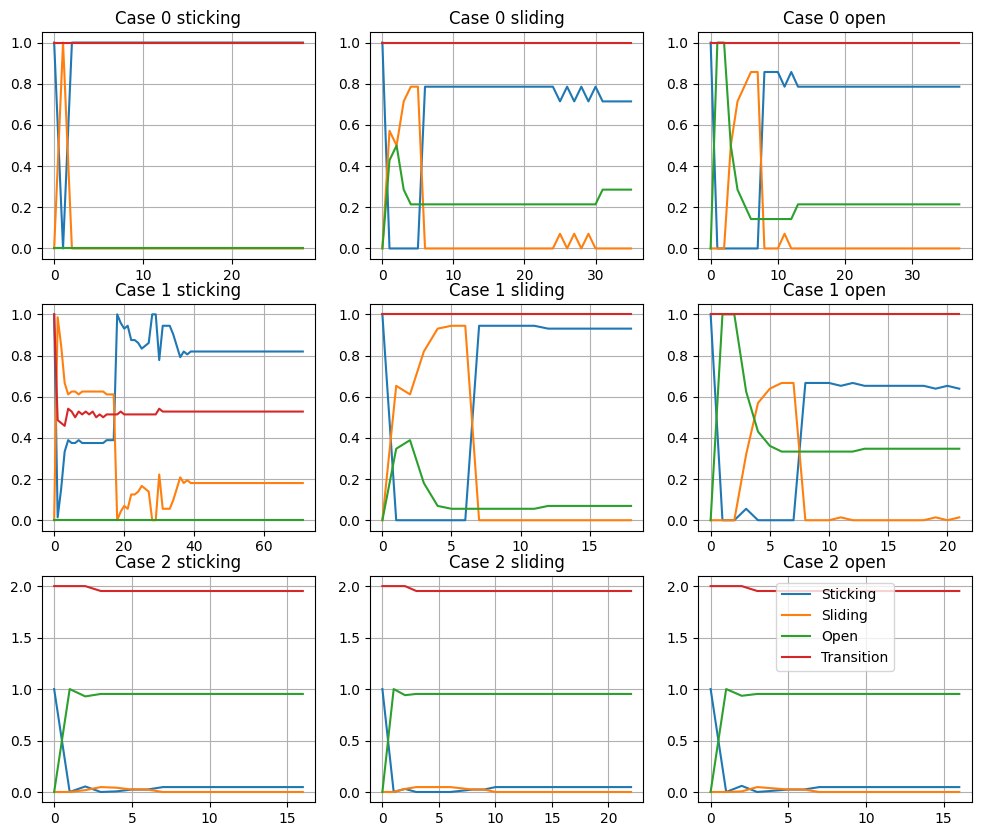

In [9]:
plt.figure(figsize=(12, 10))

for i, (name, entry) in enumerate(data.items()):

    sticking, sliding, open_ = get_num_sticking_sliding_open(entry)
    transition = get_num_transition_cells(entry)
    transition = np.array(list(map(int, transition)))
    sticking = np.array(sticking)
    sliding = np.array(sliding)
    open_ = np.array(open_)
    total = sticking + sliding + open_

    plt.subplot(3, 3, i+1)
    # color_converged_reason(entry, legend=True)
    plt.title(name)
    plt.plot(sticking / total, label='Sticking')
    plt.plot(sliding / total, label='Sliding')
    plt.plot(open_ / total, label='Open')
    plt.plot(transition / total, label='Transition')
    plt.grid()
plt.legend()

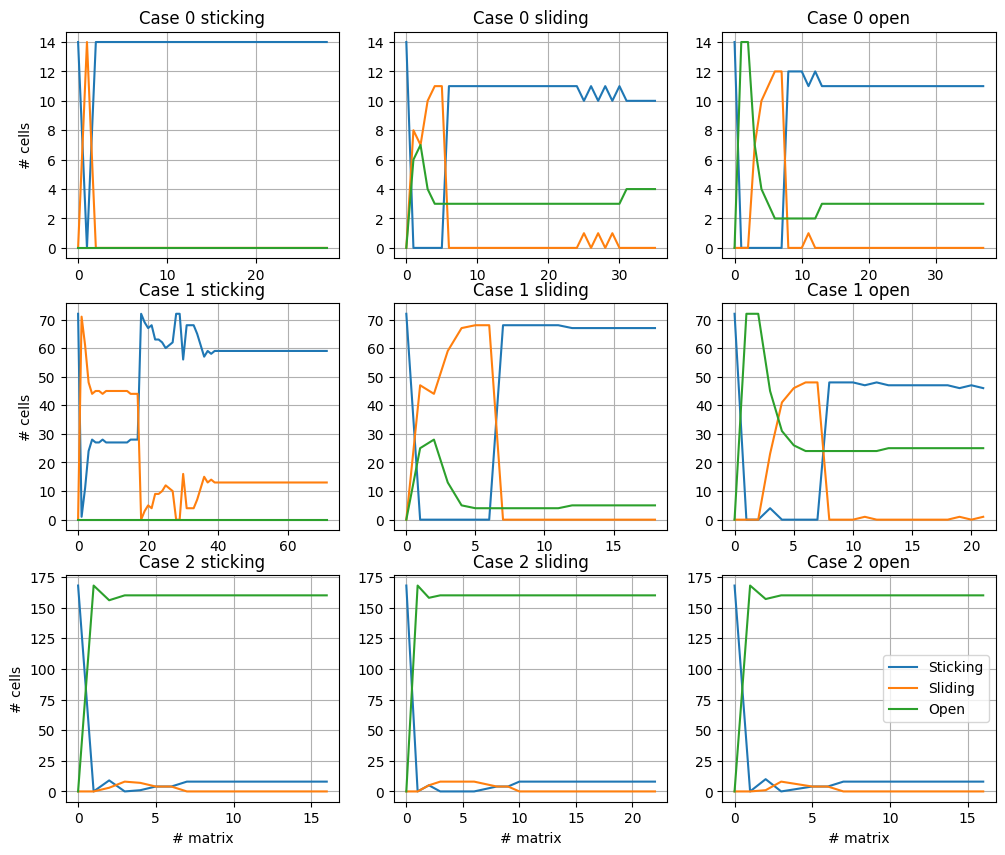

In [10]:
plt.figure(figsize=(12, 10))
for i, (name, entry) in enumerate(data.items()):
    plt.subplot(3, 3, i+1)
    # color_converged_reason(entry, legend=True)
    plt.title(name)
    sticking, sliding, open_ = get_num_sticking_sliding_open(entry)
    plt.plot(sticking, label='Sticking')
    plt.plot(sliding, label='Sliding')
    plt.plot(open_, label='Open')
    if i % 3 == 0:
        plt.ylabel('# cells')
    if i >= 6:
        plt.xlabel('# matrix')
    plt.grid()
    if i == 8:
        plt.legend()